In [2]:
EPSILON = 1e-3

# 1.1 타이어가 최고 성능을 내는 t 찾기
### 경사 상승법을 사용할 것

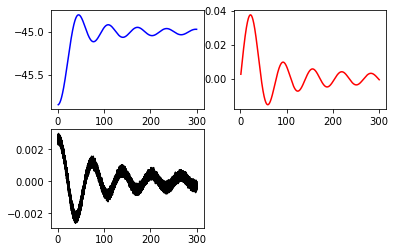

{44.98988820817976: -44.802143576935784, 76.98970005433169: -45.11467156253714, 108.01086278078016: -44.91783416835237, 139.98957281247021: -45.06342679223151, 171.01063170659813: -44.94803496644569, 201.98924107214611: -45.04335221275942, 233.01084019191603: -44.962596036436054, 263.98910455343866: -45.032457328406394, 295.0109352042696: -44.971229479908004}


최댓값은 :  -44.802143576935784


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

h = 1e-5

def f(t):
    return pow(np.exp(np.log((1/t)*np.sin(t/10)+3)),3) - 4*pow(np.exp(np.log((1/t)*np.sin(t/10)+3)),2) - 12*np.exp(np.log((1/t)*np.sin(t/10)+3))

def derivative(a):
    return (f(a+h)-f(a))/ h     # 지난시간에 만들었던 미분 함수를 재활용했습니다.

def derivative2(a):
    return (derivative(a+h) - derivative(a))/h    # 이계도함수
    

x_space = np.linspace(1,300,100000)
y_space = f(x_space)   # 원 함수(p)
y_space_2 = derivative(x_space)   # 1회 미분한 함수( 도함수 p')
y_space_3 = derivative2(x_space)  # 2회 미분한 함수( 2계도함수 p'') # 만들어는 놨는데 쓰진 않았습니다.

#plt.plot(x_space,y_space,color = 'blue')
plt.subplot(221)
plt.plot(x_space,y_space,color = 'blue')
plt.subplot(222)
plt.plot(x_space,y_space_2,color = 'red')
plt.subplot(223)
plt.plot(x_space,y_space_3,color = 'black')
plt.show()

point = {}


flag = 0   # 극값에 가까워지면 멈추기 위해 사용한 변수
start = 0  # 탐색을 시작할 온도를 저장함, 극값을 하나 찾으면 start를 증가시켜서 다음 탐색의 시작지점을 바꾼다.
x = 0   # 그래프의 x축, 루프 안에서 바뀌고 매 탐색마다 start값으로 초기화 된다

while start < 300:   #타이어의 가공 온도를 최대 300도 까지 잡고 그 이전의 값에서 극댓값을 탐색한다.
    x = start
    if(x<= 0):               # 온도가 0보다 낮아질 경우 탐색할 필요가 없으므로 시작온도를 바꿔서 다시탐색
        start += 1
        continue
    if(derivative(x) < 0):   # 순간변화율이 EPSILON보다 클 때 가까이 있는 극댓값에 접근하기 위해서 극댓값의 방향으로 이동한다
        x -= 0.01            # 극댓값으로 접근해야 하므로 기울가 음수이면 뒤로 이동, 양수이면 앞으로 이동
    else:
        x += 0.01
    if(np.abs(derivative(x)) < EPSILON):   
        # 순간변화율이 어느정도 작아지면 x의 변화량을 더 작고 촘촘하게 만들어서 더 작은 순간변화율이 나올 때 까지 접근한다.
        while(np.abs(derivative(x)) < EPSILON):
            if(x<= 0): # 온도가 0보다 낮아지면 검사하지 않도록 추가한 코드 
                start += 10
                break
            x_new = x + derivative(x)   # x에 그 점에서의 미분값을 더해주면서 극값에 접근한다.
            x = x_new
            if(np.abs(derivative(x)< 0.001)):   # 순간변화율이 충분히 작아졌다고 생각되면 루프를 멈춘다 > 이 점의 값을 사용하겠다는 뜻
                break;
        point[x] =f(x) # 극댓값을 dict로 저장한다.
        start += 20   # 다음 탐색을 위해서 시작지점을 바꿔준다. 0 > 20 > 40 > 60 순서로 탐색
    start += 1  # 시작지점을 옮겨서 다시 탐색
        
        
print(point)   # 수집한 극댓값의 정보
print("\n")
print('최댓값은 : ',max(point.values()))   # 극댓값들 중 가장 큰 값을 출력한다.


# 1.2 타이어가 최저 성능을 내는 t 찾기
### 경사 하강법을 사용할 것

In [4]:

point = {}

start = 0  # 탐색을 시작할 온도를 저장함, 극값을 하나 찾으면 start를 증가시켜서 다음 탐색의 시작지점을 바꾼다.
x = 0   # 그래프의 x축, 루프 안에서 바뀌고 매 탐색마다 start값으로 초기화 된다

while start < 300:   #타이어의 가공 온도를 최대 300도 까지 잡고 그 이전의 값에서 극솟값을 탐색한다.
    x = start
    if(x<= 0):               # 온도가 0보다 낮아질 경우 탐색할 필요가 없으므로 시작온도를 바꿔서 다시탐색
        start += 5
        continue
    if(derivative(x) < 0):   # 순간변화율이 EPSILON보다 클 때 가까이 있는 극솟값에 접근하기 위해서 극솟값의 방향으로 이동한다
        x += 0.01            # 극솟값으로 접근해야 하므로 기울가 음이면 앞으로 이동, 양수이면 뒤로 이동
    else:
        x -= 0.01
    if(np.abs(derivative(x)) < EPSILON):   
        # 순간변화율이 어느정도 작아지면 x의 변화량을 더 작고 촘촘하게 만들어서 더 작은 순간변화율이 나올 때 까지 접근한다.
        while(np.abs(derivative(x)) < EPSILON):
            x_new = x - derivative(x)   # x에 그 점에서의 미분값을 더해주면서 극값에 접근한다.
            x = x_new
            if(np.abs(derivative(x)< 0.001)):   # 순간변화율이 충분히 작아졌다고 생각되면 루프를 멈춘다 > 이 점의 값을 사용하겠다는 뜻
                break;
        point[x] =f(x) # 극솟값을 dict로 저장한다.
        start += 20   # 다음 탐색을 위해서 시작지점을 바꿔준다. 0 > 20 > 40 > 60 순서로 탐색
    start += 1 # 시작지점을 옮겨서 다시 탐색
        
print(point)   # 수집한 극댓값의 정보
print("\n")
print('최솟값은 : ',min(point.values()))   # 극솟값들 중 가장 작은 값을 출력한다.


{45.01015171366385: -44.802146247378914, 77.01027702640182: -45.11467749906097, 107.98912038646243: -44.917853110514386, 140.0104144318666: -45.06343556273187, 170.9893577212365: -44.948048517928, 202.0107501277821: -45.04336844203925, 232.9891521704601: -44.96261434145228, 264.0108888299874: -45.03247676304459, 294.9890589074628: -44.97125000318131}


최솟값은 :  -45.11467749906097


## 고찰

In [259]:
'''
2017120097 이지우

미분을 실제 코드로 만들고 복잡한 함수에 사용해 봤는데 작은 오차로 잘 구동이 되어서 좋았습니다.
수업을 듣지 않았다면 극값을 구하기 위해서 루프를 돌면서 순간변화율 값을 앱실론과 비교해 가면서 극솟값과 극댓값을 같이 구했을 것 같은데
경서 상승, 하강 알고리즘을 사용하여 근처의 원하는 극댓값이나 극솟값으로 접근할 수 있었습니다.
실제 타이어의 제작온도는 165~200도 사이라고 봤는데 정확한 값이 표시되어 있지 않고 다른 요인들이 많아서 이 함수들 만으로는 정확한 온도를
구하진 못했지만 다른 요인들도 자세히 알고 있다면 비슷하게 접근해서 온도를 구할 수 있을 것 같습니다.
0보다 낮은 온도에서의 극값은 구할 필요 없으니까 반복문에서 감지하면 반복문을 탈출하고 더 큰 시작 온도에서 다시 탐색해서 극값을 찾아가도록
만들었습니다. 
처음엔 이계도함수로 극값을 구하려고 했었는데 중간에 필요없다는걸 알고 사용하진 않았습니다. 

'''

1